# Delinquency Telecom Model

## Context
Delinquency is a condition that arises when an activity or situation does not occur at its scheduled (or expected) date i.e., it occurs later than expected.

## Content
Many donors, experts, and microfinance institutions (MFI) have become convinced that using mobile financial services (MFS) is more convenient and efficient, and less costly, than the traditional high-touch model for delivering microfinance services. MFS becomes especially useful when targeting the unbanked poor living in remote areas. The implementation of MFS, though, has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

## Data Description

A Telecom collaborates with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be delinquent if he deviates from the path of paying back the loaned amount within 5 days.
The sample data from our client database is hereby given to you for the exercise.

## Exercise
Create a delinquency model which can predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan (Label ‘1’ & ’0’)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Telecome Deliquency Dataset.csv',index_col=0)
df.head(3)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
1,0,21408I70789,272,3055.05,3065.15,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.0,29.0,UPW,7/20/2016
2,1,76462I70374,712,12122,12124.75,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.0,0.0,UPW,08-10-2016
3,1,17943I70372,535,1398,1398,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.0,0.0,UPW,8/19/2016


# Data Description

In [3]:
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

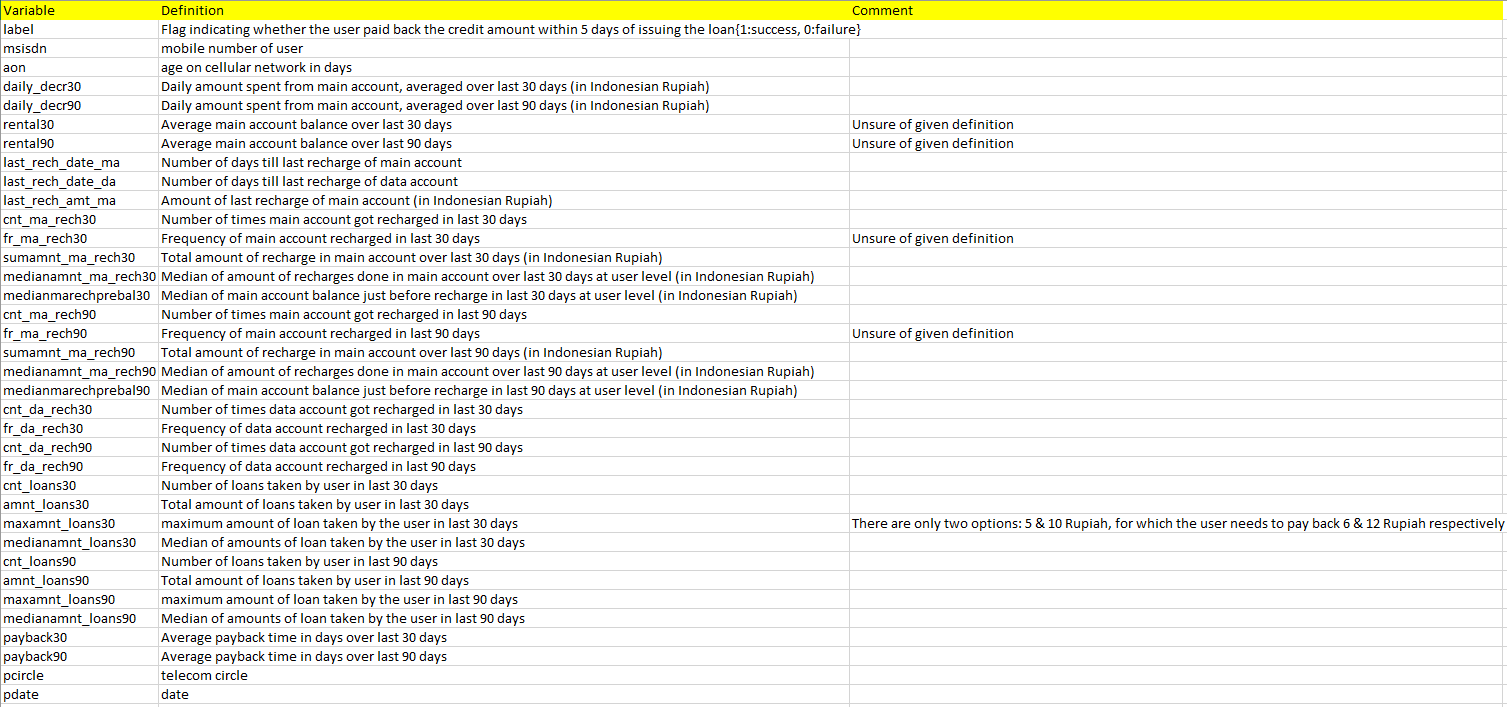

# EDA

In [4]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

So, there are no null values present here

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190001 entries, 1 to 190001
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   msisdn                190001 non-null  object 
 2   aon                   190001 non-null  object 
 3   daily_decr30          190001 non-null  object 
 4   daily_decr90          190001 non-null  object 
 5   rental30              190001 non-null  object 
 6   rental90              190001 non-null  object 
 7   last_rech_date_ma     190001 non-null  float64
 8   last_rech_date_da     190001 non-null  float64
 9   last_rech_amt_ma      190001 non-null  int64  
 10  cnt_ma_rech30         190001 non-null  int64  
 11  fr_ma_rech30          190001 non-null  float64
 12  sumamnt_ma_rech30     190001 non-null  float64
 13  medianamnt_ma_rech30  190001 non-null  float64
 14  medianmarechprebal30  190001 non-null  float64
 15  

As per data description, all the columns should be either int or float data type.

Also taking sample data as a refrence, the coulmns with object data type contains errors.

Columns need to be cleaned are 

    1.msisdn
    2.aon
    3.daily_decr30
    4.daily_decr90
    5.rental30
    6.rental90
    7.pcircle
    8.pdate

## 1. msisdn : mobile number of user

In [7]:
df['msisdn'].value_counts()

04581I85330    7
47819I90840    7
87592I84456    6
42825I88688    6
30080I90588    6
              ..
70940I90845    1
24191I95204    1
22693I90841    1
84618I88690    1
58569I90588    1
Name: msisdn, Length: 170612, dtype: int64

In msisdn (mobile number of user) 'I' is present between numbers 

The alphabet I should not be present as it is a mobile number

In [8]:
df['msisdn']=df['msisdn'].replace(regex=True, to_replace=['I'],value='')

In [9]:
df['msisdn'] = pd.to_numeric(df['msisdn'])

In [10]:
df['msisdn'].dtype

dtype('int64')

In [11]:
df['msisdn'].isnull().sum()

0

In [12]:
df['msisdn'].value_counts()

458185330     7
4781990840    7
8759284456    6
4282588688    6
3008090588    6
             ..
7094090845    1
2419195204    1
2269390841    1
8461888690    1
5856990588    1
Name: msisdn, Length: 170612, dtype: int64

As seen above the 'I' alphabet has been removed from the mobile number

## 2. aon: age on cellular network in days

In [20]:
df['aon'].iloc[18343:18354]

18344     573
18345     UA2
18346     500
18347    1735
18348     241
18349    2179
18350     761
18351    1492
18352    1021
18353     UA9
18354     642
Name: aon, dtype: object

It contain values with alphabets UA, negative values and large values with '.'

It can be in negative and may contain float i.e. '.' 

Only UA seems to be as an error.

In [21]:
df["aon"].dtype

dtype('O')

The should be a numeric and not object

In [22]:
df['aon']=df['aon'].replace(regex=True, to_replace=['UA'],value='')

In [23]:
df['aon'] = pd.to_numeric(df['aon'])

In [24]:
df["aon"].dtype

dtype('float64')

As shown, by removing UA we have converted the column to float

In [25]:
df['aon'].isnull().sum()

290

In [26]:
df['aon'].mean()

8121.7361251819875

In [27]:
df['aon'] = df['aon'].fillna(df['aon'].mean())

In [28]:
df['aon'].isnull().sum()

0

In [29]:
df['aon'].iloc[18343:18354]

18344     573.0
18345       2.0
18346     500.0
18347    1735.0
18348     241.0
18349    2179.0
18350     761.0
18351    1492.0
18352    1021.0
18353       9.0
18354     642.0
Name: aon, dtype: float64

## 3. daily_decr30: Daily amount spent from main account, averaged over last 30 days

In [36]:
df['daily_decr30'].iloc[22780]

'UA93'

It contain values with alphabets UA, negative values and large values with '.'

It can be in negative and may contain float i.e. '.'

Only UA seems to be as an error.

In [37]:
df['daily_decr30'].dtype

dtype('O')

The should be a numeric and not object

In [38]:
df['daily_decr30']=df['daily_decr30'].replace(regex=True, to_replace=['UA'],value='')

In [39]:
df['daily_decr30'] = pd.to_numeric(df['daily_decr30'])

In [40]:
df["daily_decr30"].dtype

dtype('float64')

As shown, by removing UA we have converted the column to float

In [41]:
df['daily_decr30'].isnull().sum()

51

In [42]:
df['daily_decr30'] = df['daily_decr30'].fillna(df['daily_decr30'].mean())

In [43]:
df['daily_decr30'].isnull().sum()

0

In [44]:
df['daily_decr30'].iloc[22780]

93.0

Now 'UA' is removed

## 4. daily_decr90: Daily amount spent from main account, averaged over last 90 days

In [46]:
df['daily_decr90'].iloc[67272]

'UA76'

It contain values with alphabets UA, negative values and large values with '.'

It can be in negative and may contain float i.e. '.'

Only UA seems to be as an error.

In [47]:
df['daily_decr90'].dtype

dtype('O')

The should be a numeric and not object

In [48]:
df['daily_decr90']=df['daily_decr90'].replace(regex=True, to_replace=['UA'],value='')

In [49]:
df['daily_decr90'] = pd.to_numeric(df['daily_decr90'])

In [50]:
df["daily_decr90"].dtype

dtype('float64')

As shown, by removing UA we have converted the column to float

In [51]:
df['daily_decr90'].isnull().sum()

42

In [52]:
df['daily_decr90'] = df['daily_decr90'].fillna(df['daily_decr90'].mean())

In [53]:
df['daily_decr90'].isnull().sum()

0

In [54]:
df['daily_decr90'].iloc[67272]

76.0

Now 'UA' is removed

## 5.rental_30: Average main account balance over last 30 days

In [57]:
df['rental30'].iloc[1583]

'UA87.93'

It contain values with alphabets UA, negative values and large values with '.'

It can be in negative and may contain float i.e. '.'

Here UA, #NAME and ? seems to be as an errors.

In [58]:
df['rental30'].dtype

dtype('O')

It should be a numeric and not object

In [59]:
df['rental30']=df['rental30'].replace(regex=True, to_replace=['UA'],value='')

In [60]:
df.iloc[11562:11568,3:6]

,daily_decr30,daily_decr90,rental30
11563,66.309333,66.309333,357.6
11564,177.941333,177.941333,1479.15
11565,135.467333,135.467333,510
11566,131.475667,131.475667,3093.96
11567,21.860000,21.860000,#NAME?
11568,7239.593000,7269.870000,649.51


Here after replacing 'UA' we will have to deal with #NAME?

In [61]:
df['rental30']=df['rental30'].replace(to_replace=['#NAME?'],value=np.nan)

In [62]:
df.iloc[11820,5:7]

rental30       NaN
rental90    #NAME?
Name: 11821, dtype: object

we will have to deal with ?

In [63]:
df['rental30']=df['rental30'].replace(to_replace=['?'],value=np.nan)

In [64]:
df.iloc[11820,5:7]

rental30       NaN
rental90    #NAME?
Name: 11821, dtype: object

In [65]:
df['rental30'] = pd.to_numeric(df['rental30'])

In [66]:
df['rental30'].dtype

dtype('float64')

Now we can deal with np.nan values

In [67]:
df['rental30'].isnull().sum()

94

Now filling the null value with mean of that column

In [68]:
df['rental30'] = df['rental30'].fillna(df['rental30'].mean())

In [69]:
df.iloc[11562:11568,3:6]

,daily_decr30,daily_decr90,rental30
11563,66.309333,66.309333,357.60000
11564,177.941333,177.941333,1479.15000
11565,135.467333,135.467333,510.00000
11566,131.475667,131.475667,3093.96000
11567,21.860000,21.860000,2682.02897
11568,7239.593000,7269.870000,649.51000


## 6.rental90: Average main account balance over last 90 days

In [72]:
df['rental90'].iloc[4567]

'UA84.12'

It contain values with alphabets UA, negative values and large values with '.'

It can be in negative and may contain float i.e. '.'

Here UA, #NAME and ? seems to be as an errors.

In [73]:
df['rental90'].dtype

dtype('O')

It should be a numeric and not object

In [74]:
df['rental90']=df['rental90'].replace(regex=True, to_replace=['UA'],value='')

In [75]:
df.iloc[11562:11568,3:7]

,daily_decr30,daily_decr90,rental30,rental90
11563,66.309333,66.309333,357.60000,357.6
11564,177.941333,177.941333,1479.15000,1479.15
11565,135.467333,135.467333,510.00000,510
11566,131.475667,131.475667,3093.96000,3093.96
11567,21.860000,21.860000,2682.02897,#NAME?
11568,7239.593000,7269.870000,649.51000,688.51


Here after replacing 'UA' we will have to deal with #NAME?

In [76]:
df['rental90']=df['rental90'].replace(to_replace=['#NAME?'],value=np.nan)

In [77]:
df.iloc[11820,5:7]

rental30    2682.02897
rental90           NaN
Name: 11821, dtype: object

we will have to deal with ?

In [78]:
df['rental90']=df['rental90'].replace(to_replace=['?'],value=np.nan)

In [79]:
df.iloc[11820,5:7]

rental30    2682.02897
rental90           NaN
Name: 11821, dtype: object

In [80]:
df['rental90'] = pd.to_numeric(df['rental90'])

In [81]:
df['rental90'].dtype

dtype('float64')

Now we can deal with np.nan values

In [82]:
df['rental90'].isnull().sum()

79

Now filling the null value with mean of that column

In [83]:
df['rental90'] = df['rental90'].fillna(df['rental90'].mean())

In [84]:
df.iloc[11562:11568,3:7]

,daily_decr30,daily_decr90,rental30,rental90
11563,66.309333,66.309333,357.60000,357.600000
11564,177.941333,177.941333,1479.15000,1479.150000
11565,135.467333,135.467333,510.00000,510.000000
11566,131.475667,131.475667,3093.96000,3093.960000
11567,21.860000,21.860000,2682.02897,3471.270741
11568,7239.593000,7269.870000,649.51000,688.510000


## 7. pcircle: telecom circle

In [85]:
df['pcircle'].value_counts()

UPW    190001
Name: pcircle, dtype: int64

In [86]:
df['pcircle'].isnull().sum()

0

The data is already cleared

## 8. pdate: date

In [87]:
df['pdate'].isnull().sum()

0

In [88]:
df['pdate'].value_counts()

07-04-2016    2857
07-05-2016    2823
07-07-2016    2819
6/17/2016     2814
6/20/2016     2808
              ... 
06-04-2016    1413
8/18/2016     1281
8/19/2016     1021
8/20/2016      717
8/21/2016      291
Name: pdate, Length: 82, dtype: int64

The dates are in format 07-04-2016 and 8/21/2016

So we can change it to one single format as per sample data 'yy-mm-dd' ex. 2016-08-21

In [89]:
df['pdate'].dtype

dtype('O')

Firstly, we need to change the data type to date

In [90]:
df['pdate'] = pd.to_datetime(df['pdate'])

In [91]:
df['pdate'].dtype

dtype('<M8[ns]')

Now, changing the date format

In [92]:
df['pdate']= df['pdate'].dt.strftime("%y-%m-%d")

In [93]:
df['pdate'].value_counts()

16-07-04    2857
16-07-05    2823
16-07-07    2819
16-06-17    2814
16-06-20    2808
            ... 
16-06-04    1413
16-08-18    1281
16-08-19    1021
16-08-20     717
16-08-21     291
Name: pdate, Length: 82, dtype: int64

# Saving the cleaned data

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190001 entries, 1 to 190001
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 190001 non-null  int64  
 1   msisdn                190001 non-null  int64  
 2   aon                   190001 non-null  float64
 3   daily_decr30          190001 non-null  float64
 4   daily_decr90          190001 non-null  float64
 5   rental30              190001 non-null  float64
 6   rental90              190001 non-null  float64
 7   last_rech_date_ma     190001 non-null  float64
 8   last_rech_date_da     190001 non-null  float64
 9   last_rech_amt_ma      190001 non-null  int64  
 10  cnt_ma_rech30         190001 non-null  int64  
 11  fr_ma_rech30          190001 non-null  float64
 12  sumamnt_ma_rech30     190001 non-null  float64
 13  medianamnt_ma_rech30  190001 non-null  float64
 14  medianmarechprebal30  190001 non-null  float64
 15  

In [95]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [96]:
df.to_csv("Major Project-Cleaned Data.csv")